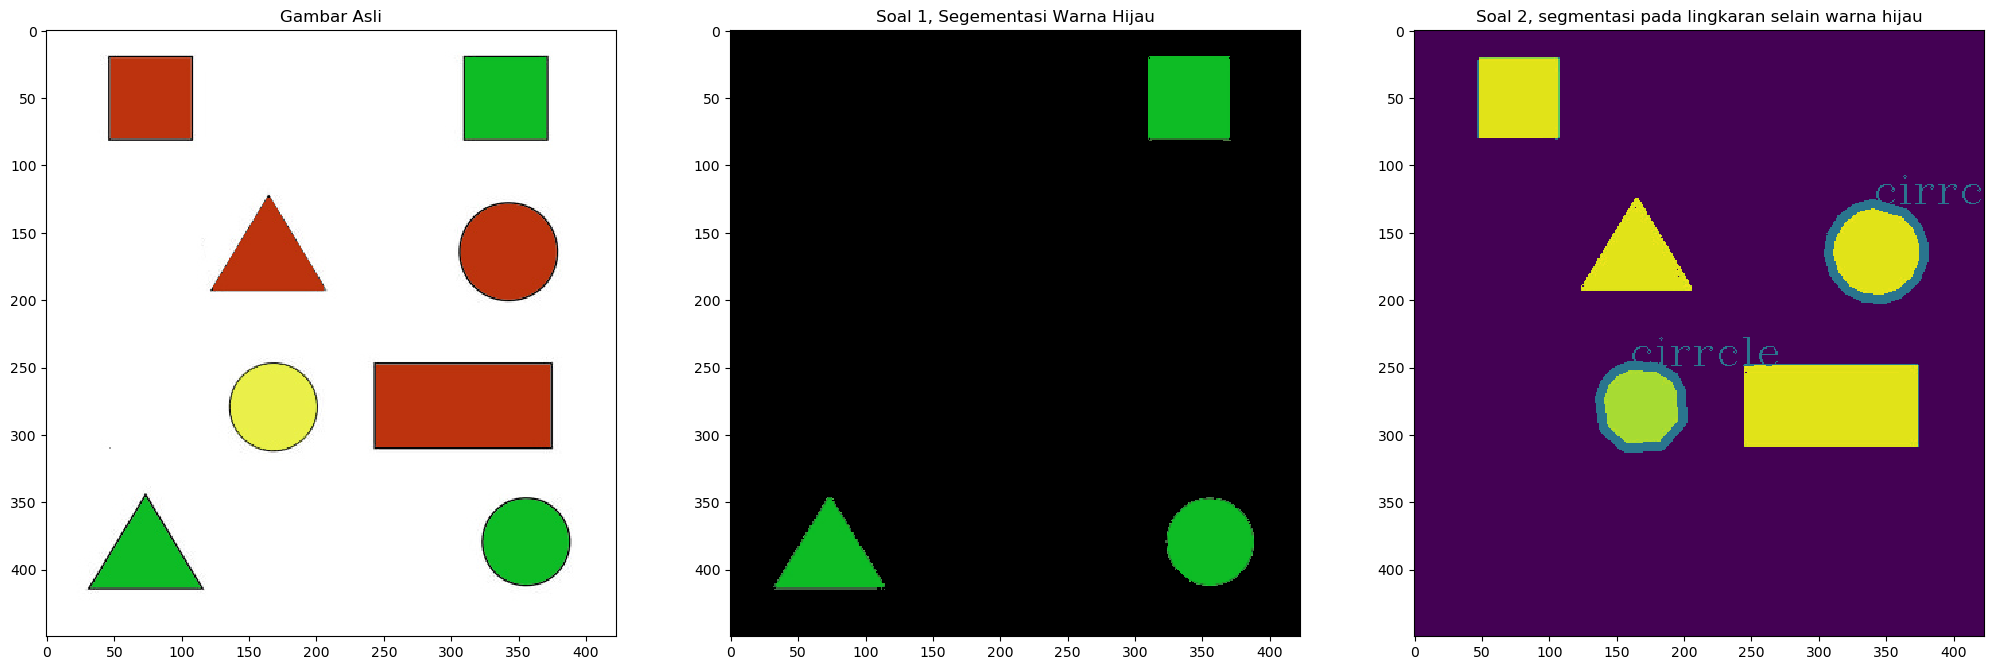

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

folder_path = "D:\Kuliah\Semester 4\Computer Vesion\Gambar"
lower_green = np.array([0,100,0])
upper_green = np.array([80,255,100])

lower_kuning = np.array([20,100,100])
upper_kuning = np.array([40,255,255])
lower_red = np.array([0,50,70])
upper_red = np.array([20,250,255])
font = cv2.FONT_HERSHEY_COMPLEX
font_color = (80,255,100)


def latar():
    return plt.figure(num=None, figsize=(25,20), dpi=100)

def TampilGamar(img,title):
    plt.imshow(img)
    plt.title(title)

def SegmentasiWarna (path,title):
    img = cv2.imread(path)
    img = cv2.medianBlur(img,(3))
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(rgb,lower_green,upper_green)
    segment = cv2.bitwise_and(rgb,rgb,mask = mask)
    TampilGamar(segment,title)

def detection (path,title):
    img = cv2.imread(path)
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(hsv,lower_kuning,upper_kuning)
    mask2 = cv2.inRange(hsv,lower_red,upper_red)
    masking = cv2.bitwise_xor(mask1,mask2)
    segmentasi = cv2.bitwise_and(hsv,hsv,mask=masking)
    gray = cv2.cvtColor(segmentasi,cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
        x = approx.ravel()[0]
        y = approx.ravel()[1]

        if len(approx) == 3 :
            ()
        elif len(approx) == 4 :
            ()
        else :
            shape = approx.shape
            cv2.putText(gray, "circle", (x, y), font, 1, font_color, (0))
            cv2.drawContours(gray, [approx], 0, font_color, 5)
            threh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    TampilGamar(gray,title)

latar()
def listDir(dir):
    fileName = os.listdir(dir)
    for FilenNames in fileName:
        path = os.path.abspath(os.path.join(dir,FilenNames))
        img = cv2.imread(path)
        rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

        plt.subplot(1, 3, 1), TampilGamar(rgb,"Gambar Asli")
        plt.subplot(1, 3, 2), SegmentasiWarna(path,"Soal 1, Segementasi Warna Hijau")
        plt.subplot(1, 3, 3), detection(path,'Soal 2, segmentasi pada lingkaran selain warna hijau')


if __name__ == '__main__':
    listDir(folder_path)